<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Analog2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paquetes

In [1]:
pip install spectrum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install dtw-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install statsmodels==0.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import time
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV, Lasso, Ridge, BayesianRidge, LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from math import sqrt
from dtw import *
from scipy import stats
import statsmodels.tools.eval_measures as bias
from statsmodels.tsa.ar_model import AutoReg
%matplotlib inline
from sklearn import preprocessing

sns.set_theme(style="white")

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Carga de datos

In [6]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Demanda = 'https://drive.google.com/file/d/1xcpXDTE7H6EBMLOkic5lq-lzSwiLG2ZS/view?usp=sharing'

df_Demanda  = pd.read_csv(path + URL_Demanda .split('/')[-2], usecols=[0] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
df_Demanda.dropna(inplace=True)
# serie = df_Demanda.to_numpy()
# serie = StandardScaler().fit_transform(serie)
# serie = serie.ravel()  ## Con esto quitamos el bracket o corchete en cada uno de los elementos del arreglo

# Funciones

In [7]:
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

In [8]:
def diff(list1,list2):
    difference = []
    zip_object = zip(list1, list2)
    for list1_i, list2_i in zip_object:
        difference.append(list1_i-list2_i)
    return difference

In [9]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; NARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-"; MAGE="FF00FF";
def print_serie2(serie_,prototipo_,title_,ytitle_,xtitle_,sizex_=8,sizey_=5,namefile_='fig_t16_serie.png'):
    fig, ax1 = plt.subplots(figsize=(sizex_,sizey_))
    plt.title(title_,fontsize='x-large',color=NARA)
    ax1.set_xlabel(xtitle_, color=NARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=NARA, fontsize='large')
    plt.tick_params(colors = NARA, which='both')
    ax1.spines['bottom'].set_color(NARA)
    ax1.spines['top'   ].set_color(NARA) 
    ax1.spines['right' ].set_color(NARA)
    ax1.spines['left'  ].set_color(NARA)
    if len(prototipo_) != 0: 
        plt.plot(prototipo_,alpha=0.6, linestyle='dashed', color='red', linewidth=3)
    for p in serie_:
        plt.plot(p,alpha=0.3, linewidth=2)    
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [10]:
## Preparamos la información para graficar la importancia y las posiciones en Random Forest Regressor
def print_importances(model_,labels_,namefile_):
    i=0
    labels = [str(x) for x in labels_]
    labels_importances = []
    for feature in model_.feature_importances_:
        labels_importances.append((feature,labels[i]))
        i=i+1   
    labels_importances.sort(key=lambda tup: tup[0], reverse=False)
    importances = []
    labels      = []
    for tup in labels_importances:
        importances.append(tup[0])
        labels.append(tup[1])
    fig, ax = plt.subplots()
    y_pos = np.arange(len(importances))
    ax.set_yticks(ticks=y_pos)
    ax.barh(labels, importances, align='center',color=CYAN)
    ax.invert_yaxis()
    ax.set_xlabel('Importancia', color=NARA, fontsize='large')
    ax.set_ylabel('Variable', color=NARA, fontsize='large')
    ax.set_title( 'Importancia de las variables del bosque aleatorio', color=NARA, fontsize='large')    
    plt.tick_params(colors = NARA, which='both')
    ax.spines['bottom'].set_color(NARA)
    ax.spines['top'   ].set_color(NARA) 
    ax.spines['right' ].set_color(NARA)
    ax.spines['left'  ].set_color(NARA)
    plt.savefig(namefile_, transparent=True)   
    plt.show()

In [11]:
def OLSstep(X, Y, X_2, pi_step_=0.001,verbose_=False):
    model   = sm.OLS(Y, X)
    results = model.fit()
    prediction_Y2 = results.predict(X_2)

    ## Ordenamos los valores 'pi' y se selecciona el más grande.
    i = 0
    pvalues = []
    for pi in results.pvalues:
        pvalues.append((i,pi))
        i = i + 1
    pvalues.sort(key=lambda tup: tup[1], reverse=True) ## Ordenamos por 'pi'
    (i, pi) = pvalues[0]  

    while pi > pi:
        X   = sm.add_constant(X)
        X_2 = sm.add_constant(X_2)   
        if verbose_==True:
            print('Retiramos regresor ---> X' + str(i))
        X   = np.delete(arr=X,   obj=i+0, axis=1)
        X_2 = np.delete(arr=X_2, obj=i+0, axis=1)   
        model   = sm.OLS(Y, X)
        results = model.fit()

        ## Ordenamos los valores 'pi' y se selecciona el más grande
        i = 0
        pvalues = []
        for pi in results.pvalues:
            pvalues.append((i,pi))
            i = i + 1
        pvalues.sort(key=lambda tup: tup[1], reverse=True) ## Ordenamos por 'pi'
        (i, pi) = pvalues[0]
        #prediction   = results.predict(X)   ## Ajuste
        prediction_Y2 = results.predict(X_2) ## Pronóstico
    if len(prediction_Y2) == 0:      
        if verbose_==True:
            print('>>> Warning, no variable was significant in the regression.')
        model   = sm.OLS(Y, X)
        results = model.fit()
        prediction_Y2 = results.predict(X_2)
        
    if verbose_==True:
        print(results.summary())
    return prediction_Y2   

In [12]:
def RF(X, Y, X_2,labels_,typedist_,verbose_=False):
    model         = RandomForestRegressor(random_state=42)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    if verbose_==True:
        print_importances(model_=model,labels_=labels_,namefile_='fig_t16_importance_'+typedist_+'_'+'RF')
        print('Parámetros utilizados RF')
        print("bootstrap:         {}".format(model.bootstrap))
        print("n_estimators:      {}".format(model.n_estimators))
        print("max_features:      {}".format(model.max_features))
        print("max_depth:         {}".format(model.max_depth))
        print("min_samples_leaf:  {}".format(model.min_samples_leaf))
        print("min_samples_split: {}".format(model.min_samples_split))
    return prediction_Y2   

In [13]:
def AutoRF(X, Y, X_2,labels_,typedist_,verbose_=False):
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    #nestlist = []
    #for i in range(10, 320, 50):
    #    nestlist.append(i)
    #param_grid = { 
    #'bootstrap': [True, False],
    #'n_estimators': nestlist,
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    #'min_samples_leaf': [1, 2, 4],
    #'min_samples_split': [2, 5, 10],}
    nestlist = []
    for i in range(10, 320, 50):
        nestlist.append(i)
    param_grid = { 
        'bootstrap': [True, False],
        'n_estimators': nestlist,
        'max_features': ['auto', 'sqrt',],
        'max_depth' : [10, 20, None]}

    model = RandomForestRegressor(random_state=42)
    clf   = GridSearchCV(estimator=model, param_grid=param_grid, cv=5).fit(X, Y)
    model         = clf.best_estimator_
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)

    if verbose_==True:
        print_importances(model_=model,labels_=labels_,namefile_='fig_t16_importance_'+typedist_+'_'+'AutoRF')
        print('Parameters used')
        print("bootstrap:         {}".format(model.bootstrap))
        print("n_estimators:      {}".format(model.n_estimators))
        print("max_features:      {}".format(model.max_features))
        print("max_depth:         {}".format(model.max_depth))
        print("min_samples_leaf:  {}".format(model.min_samples_leaf))
        print("min_samples_split: {}".format(model.min_samples_split))        
    return prediction_Y2   

In [14]:
def Boosting(X, Y, X_2,typedist_,verbose_=False):
    model         = GradientBoostingRegressor(random_state=42,)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2
def Bagging(X, Y, X_2,typedist_,verbose_=False):
    model         = BaggingRegressor(random_state=42,)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2   
def AdaBoost(X, Y, X_2,typedist_,verbose_=False):
    model         = AdaBoostRegressor(random_state=42,)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2 
def LinearReg(X, Y, X_2,typedist_,verbose_=False):
    model         = LinearRegression()
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2
def BayesRidge(X, Y, X_2,typedist_,verbose_=False):
    model         = BayesianRidge(compute_score=True)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2) 
    return prediction_Y2   
def LassoReg(X, Y, X_2,typedist_,verbose_=True):
    model         = Lasso(alpha=0.1)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2  
def RidgeReg(X, Y, X_2,typedist_,verbose_=False):
    model         = Ridge(alpha=0.1)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2    
def PLS(X, Y, X_2,n_components,typedist_,verbose_=False):
    model         = PLSRegression(n_components=n_components)
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2
def PCR(X, Y, X_2,n_components,typedist_,verbose_=False):
## https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
    model         = make_pipeline(PCA(n_components=n_components), LinearRegression())
    results       = model.fit(X, Y)
    prediction_Y2 = results.predict(X_2)
    return prediction_Y2    

In [15]:
def VotingEnsemble(X, Y, X_2,verbose_=False):  
    ## https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py
    gb  = GradientBoostingRegressor(random_state=42)
    rf  = RandomForestRegressor(random_state=42)
    br  = BaggingRegressor(random_state=42)
    ab  = AdaBoostRegressor(random_state=42)
    gb.fit(X, Y)
    rf.fit(X, Y)
    br.fit(X, Y)
    ab.fit(X, Y)
    voting = VotingRegressor([("gb",gb), ("rf",rf), ("br",br), ("ab",ab)]) #
    voting.fit(X, Y)
    prediction_Y2 = voting.predict(X_2)    
    if verbose_ == True:
        predgb  = gb.predict(X_2)
        predrf  = rf.predict(X_2)
        predbr  = br.predict(X_2)  
        predab  = ab.predict(X_2) 
        ## https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html Markers, Line styles ,Colors
        fig, ax = plt.subplots(figsize=(19,10))
        plt.plot(predgb,  "md" , label="GradientBoostingRegressor") ## go- rs 
        plt.plot(predrf,  "b^" , label="RandomForestRegressor")
        plt.plot(predbr,  "go-", label="BaggingRegressor")
        plt.plot(predab,  "kD" , label="AdaBoostRegressor")
        plt.plot(prediction_Y2, "r*", ms=10, label="VotingEnsemble")
        plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
        plt.ylabel("demanda estandarizada", color=NARA, fontsize='large')
        plt.xlabel("training samples", color=NARA, fontsize='large')
        plt.legend(loc="best")
        plt.title("Pronósticos de ensambles y su promedio", color=NARA, fontsize='large')
        plt.tick_params(colors = NARA, which='both')
        ax.spines['bottom'].set_color(NARA)
        ax.spines['top'   ].set_color(NARA) 
        ax.spines['right' ].set_color(NARA)
        ax.spines['left'  ].set_color(NARA)
        plt.savefig("fig_t16_VotingEnsemble", transparent=True) 
        plt.show()
    return prediction_Y2   

In [16]:
def VotingLinear(X, Y, X_2,verbose_=False):  
    ## https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py
    pl = PLSRegression(n_components=1)
    lr = LinearRegression()
    ri = Ridge(alpha=0.1)
    la = Lasso(alpha=0.1)    
    pc = make_pipeline(PCA(n_components=1), LinearRegression())
    pl.fit(X, Y)
    lr.fit(X, Y)
    ri.fit(X, Y)
    la.fit(X, Y)
    pc.fit(X, Y)
    voting = VotingRegressor([("lr",lr),("ri",ri),("la",la),("pc",pc)]) #,("pl",pl)
    voting.fit(X, Y)
    prediction_Y2 = voting.predict(X_2)    
    if verbose_ == True:
        predpl = pl.predict(X_2)
        predlr = lr.predict(X_2)
        predri = ri.predict(X_2)
        predla = la.predict(X_2)
        predpc = pc.predict(X_2)
        ## https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html Markers, Line styles ,Colors
        fig, ax = plt.subplots(figsize=(17,9))
        plt.plot(predpl,  "md" , label="PLSRegression")
        plt.plot(predlr,  "b^" , label="LinearRegression")
        plt.plot(predri,  "go-", label="Ridge")
        plt.plot(predla,  "ys" , label="Lasso")
        plt.plot(predpc,  "cs" , label="PCR")
        plt.plot(prediction_Y2, "r*", ms=10, label="VotingLinear")
        plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
        plt.ylabel("demanda estandarizada", color=NARA, fontsize='large')
        plt.xlabel("training samples", color=NARA, fontsize='large')
        plt.legend(loc="best")
        plt.title("Pronósticos lineales y su promedio", color=NARA, fontsize='large')
        plt.tick_params(colors = NARA, which='both')
        ax.spines['bottom'].set_color(NARA)
        ax.spines['top'   ].set_color(NARA) 
        ax.spines['right' ].set_color(NARA)
        ax.spines['left'  ].set_color(NARA)
        plt.savefig("fig_t16_VotingLinear", transparent=True) 
        plt.show()
    return prediction_Y2   

In [17]:
## Calcula distancia euclidiana
def euclidean(neig1, neig2):
	  distance = 0.0
	  for i in range(len(neig1)):
		    distance += (neig1[i] - neig2[i])**2
	  return sqrt(distance)

In [18]:
def analogo_knn(serie,vsele,k=10,tol=0.8,n_components=3,typedist='pearson',typereg='OLSstep',verbose=False):    
#    vsele      : Tamanio de la ventana de selección
#    k          : Número de vecinos a buscar k
#    tol        : Tolerancia de tamaño de ventanas para seleccion de vecinos
#    typedist   : medida de distancia, 'euclidian' o 'pearson' o 'dtw' 

    t_o = time.time()
    n = len(serie) ## longitud total de la serie

    ## PASO 1: Selección de las ventanas de mayor correlación.

    ## Calculamos la distancia entre todos los vecinos.
    distances = []
    Y = serie[n-vsele:n]           ## últimos datos
    for i in range(n-2*vsele):                              
        if  typedist == 'dtw':     ## dynamic time warping
            dist = dtw(Y, serie[i:i+vsele]).distance  
        elif typedist == 'euclidian':
            dist = euclidean(Y,serie[i:i+vsele])
        else:
            dist = np.corrcoef(Y,serie[i:i+vsele])[1,0]
        if dist > 0:
            distances.append((i, dist))
        
    ## Calculamos el vecindario por distancia de menor a mayor y se guardan las posiciones.
    if typedist == 'pearson':
        ## En caso de pearson se ordena al revés, nos interesan los mayor correlación.
        distances.sort(key=lambda tup: tup[1], reverse=True)
    else:
        ## En caso de pearson se ordena al revés, nos interesan los de menor distancia.
        distances.sort(key=lambda tup: tup[1], reverse=False)

    neighbors  = []
    neighbors2 = []
    positions  = []

    ## Calculamos los k vecinos mas cercanos y guardamos las posiciones.
    i = 0
    for pos, dis in distances:
        if i==0:      
            positions.append(pos)   
            neighbors.append(serie[pos:pos+vsele])
            neighbors2.append(serie[pos+vsele:pos+2*vsele])  
        else:
            bandera = True
            for p in positions:
                 ## si ya teniamos una posición en la lista que pase la tolerancia, ya no la guardamos 
                if (abs(pos - p) < tol*vsele):
                    bandera = False
                    i = i - 1
                    break
            if bandera == True:
                ## Guarda nuevo vecino
                positions.append(pos)   
                neighbors.append(serie[pos:pos+vsele])
                neighbors2.append(serie[pos+vsele:pos+2*vsele])  
                bandera = False
        i = i + 1
        if i == k:
            break
    if verbose==True:
        print('positions KNN:', positions) ## posición de los k vecinos mas cercanos

    neighbors  = np.array(neighbors)  
    neighbors2 = np.array(neighbors2)    
    vacia = []
    if verbose==True:
        print_serie2(neighbors,Y,'Selección con KNN:'+typedist,'demanda','time',8,5,'fig_t16_X_'+typedist+'_'+typereg)

    t_sel = time.time() - t_o

    ## PASO 2: Regresión entre los vecinos mas cercanos 'X' y la última ventana 'Y'

    ## Definimos nuestros regresores   
    X   = (neighbors.T ).tolist()
    X_2 = (neighbors2.T).tolist()
    Y   = (Y).tolist()
    prediction_Y2 = []

    ## -- Random forest regression --
    if typereg == 'RF':
        prediction_Y2 = RF(X,Y,X_2,labels_=positions,typedist_=typedist,verbose_=verbose)

    ## -- OLS with Stepwise --
    if typereg == 'OLSstep':
        prediction_Y2 = OLSstep(X,Y,X_2, pi_step_=0.001,verbose_=verbose)

    ## -- Gradiant boosting regression --
    if typereg == 'Boosting':
        prediction_Y2 = Boosting(X, Y, X_2,typedist_=typedist,verbose_=verbose)   

    ## -- Bagging regression --
    if typereg == 'Bagging':
        prediction_Y2 = Bagging(X, Y, X_2,typedist_=typedist,verbose_=verbose)   

    ## -- Linear regression --
    if typereg == 'LinearReg':
        prediction_Y2 = LinearReg(X, Y, X_2,typedist_=typedist,verbose_=verbose)   

    ## -- Ada boosting --
    if typereg == 'AdaBoost':
        prediction_Y2 = AdaBoost(X, Y, X_2,typedist_=typedist,verbose_=verbose)  

    ## -- Bayesian Ridge --
    if typereg == 'BayesRidge':
        prediction_Y2 = BayesRidge(X, Y, X_2,typedist_=typedist,verbose_=verbose)  

    ## -- Lasso regression --
    if typereg == 'LassoReg':
        prediction_Y2 = LassoReg(X, Y, X_2,typedist_=typedist,verbose_=verbose)   

    ## -- Ridge regression --
    if typereg == 'RidgeReg':
        prediction_Y2 = RidgeReg(X, Y, X_2,typedist_=typedist,verbose_=verbose)

    ## -- PLS Regression --
    if typereg == 'PLS':
        prediction_Y2 = PLS(X, Y, X_2,n_components=n_components,typedist_=typedist,verbose_=verbose)

    ## -- PCA Regression --
    if typereg == 'PCR':
        prediction_Y2 = PCR(X, Y, X_2,n_components=n_components,typedist_=typedist,verbose_=verbose)

    ## -- Voting regression with ensemble models -- 
    if typereg == 'VotingEnsemble':
        prediction_Y2 = VotingEnsemble(X,Y,X_2,verbose_=verbose)

    ## -- Voting regression with linear model -- 
    if typereg == 'VotingLinear':
        prediction_Y2 = VotingLinear(X,Y,X_2,verbose_=verbose)
        
    ## -- Random forrest regression with GridSearchCV--
    if typereg == 'AutoRF':
        prediction_Y2 = AutoRF(X, Y, X_2,labels_=positions,typedist_=typedist,verbose_=verbose)        

    if verbose==True:
        print_serie2(neighbors2,prediction_Y2, 'Pronóstico - ' + typedist+' - ' + typereg ,'Demanda','Tiempo',8,5,'fig_t16_Y2_'+typedist+'_'+typereg)

    t_reg = time.time() - t_sel - t_o
    #if typedist=='pearson':
    #  t_sel =2.2038
    #if typedist=='euclidian':
    #  t_sel =23.4583
    fail_=False
    if len(prediction_Y2) == 0:
        prediction_Y2=[serie[-1]] * vsele
        fail_=True
        print(">>> analogo_knn: Pronóstico no calculado.")

    ## Dibujamos un ejemplo de espacio análogo
    if False:
        fig, ax = plt.subplots(figsize=(8,5))
        ax.legend(['First line', 'Second line'])
        serie1=serie[positions[0]:positions[0]+2*vsele]
        serie2=serie[positions[1]:positions[1]+2*vsele]
        serie3=serie[positions[2]:positions[2]+2*vsele]
        serie4=serie[positions[3]:positions[3]+2*vsele]
        serie5=serie[positions[4]:positions[4]+2*vsele]
        serie6=serie[positions[5]:positions[5]+2*vsele]
        ax.plot(serie1, label='X$_1$')
        ax.plot(serie2, label='X$_2$')
        ax.plot(serie3, label='X$_3$')
        ax.plot(serie4, label='X$_4$')
        ax.plot(serie5, label='X$_5$')
        ax.plot(serie6,label='X$_6$')
        ax.plot(Y,label='Y', linewidth=3, color='r')   
        c = np.concatenate((Y,prediction_Y2), axis=0)   
        ax.plot(c, label='$Y\'$', linewidth=3, color='r',linestyle='--')      
        plt.legend()
        plt.axvline(x = vsele,linestyle='-.') # '-', '--', '-.', ':',
        ax.set(xlabel='time (5 min)', ylabel='demand (MW)') #title='High correlation windows'
        ax.grid()

        fig.savefig('test'+str(random.randint(1,30000))+'.pdf')
        plt.show()

    return prediction_Y2, t_sel, t_reg, fail_

---
# Pruebas unitarias del método análogo



In [19]:
## Controla las pruebas unitarias al modelo análogo
flag_unit_test =False

In [20]:
## ... (time serie) ... window.window.window.window.window.window.window.window.window.window.window.
##                                           |                                               |       |
##                                           |                                               |       |
##                                           |<------------------ vsele -------------------->|<vpred>|
##                                                       (selection and regression)        (prediction)
##                                                                                                 
##|<---------------------------------------- train ----------------------------------------->| <test>|

## Parámetros del método Análogo
if flag_unit_test:
    periods       = 288       ## Número de periodos en una ventana
    periods_sele  = 1         ## Número de ventanas de selección
    periods_pred  = 1         ## Número de ventanas de pronóstico

    vsele = periods * periods_sele ## Número de periodos para selección
    vpred = periods * periods_pred ## Número de periodos para pronóstico

    k   = 6   ## k:   número de vecinos mas cercanos
    tol = 0.8 ## tol: porcentaje de tolerancia de cercania entre ventanas

    ## Dibujamos la ventana de histórico y los datos de prueba  
    series = []; vacia = []; n = 2
    series.append(serie[len(serie)-n*vsele : len(serie)-vsele+vpred])
    series.append(serie[len(serie)-n*vsele : len(serie)-vsele])
    print_serie2(serie_=series,prototipo_=vacia , title_='Serie de demanda eléctrica', ytitle_='Demanda (estandarizada)',xtitle_='Tiempo', sizex_=20, sizey_=6, namefile_='fig_t15_demanda')

    ## Definimos la ventana de prueba y entrenamiento
    X_train = serie[0 : len(serie) - vpred]
    y_test  = serie[len(serie) - vpred : len(serie)]

    ## Guardamos todos los resultados aquí
    dferror = pd.DataFrame(columns=['distance','regression','MAE','MAPE','timesel','timereg'])

    ## Bandera que activa todos los pronósticos
    debug  = 0
    active = 0

In [21]:
if flag_unit_test:
  distances = ['pearson', 'euclidian']
  methods = ['RF', 'OLSstep', 'Boosting', 'Bagging', 'LinearReg', 'AdaBoost', 'LassoReg', 'RidgeReg', 'PLS', 'PCR', 'VotingEnsemble', 'VotingLinear'] # AutoRF, 'BayesRidge'
  preds = []
  for d in distances:
    for m in methods:
      pred_, t_sel_, t_reg_ = analogo_knn(X_train, vsele=vsele, k=k, tol=tol, typedist=d, typereg=m, verbose=False)
      preds.append({
          'distance' : d,
          'method'   : m,
          'y_cap'    : pred_
      })
      mae_  = mean_absolute_error(y_test, pred_[0:vpred])
      mape_ = mean_absolute_percentage_error(y_test,pred_[0:vpred])
      dferror.loc[dferror.shape[0]] = [d, m, mae_, mape_,t_sel_,t_reg_]
  preds = pd.DataFrame(preds)
  
  display(dferror.head())
  display(preds.head())
  dferror["time"]         = dferror["timereg"] + dferror["timesel"]
  dferror["invtime"]      = 1 / ( dferror["timereg"] + dferror["timesel"])
  dferror["invtime/MAPE"] = dferror["invtime"] / dferror["MAPE"]
  dferror["invtime/MAE"]  = dferror["invtime"] / dferror["MAE"]
  dferror.sort_values("invtime/MAE",ascending=False)
  dferror.sort_values("invtime/MAPE",ascending=False)
  dferror.sort_values("MAPE",ascending=True)
  dferror.head()

In [22]:
if flag_unit_test:  
  sel1 = ['R', 'Boosting', 'Bagging', 'AdaBoost', 'VotingEnsemble']
  sel2 = ['OLSstep', 'LassoReg', 'RidgeReg', 'PLS', 'PCR', 'VotingLinear']

  # cmap para colores distintos para cada distancia-método

  for d in distances:
    plt.figure(figsize=(25,8))
    plt.plot(y_test, '.', label= '$Y_{\\beta+2}$')
    for r in preds.iterrows():
      values = r[1]
      if values.distance == d and values.method in sel1:
        plt.plot(values.y_cap, label = 'Y_{' + values.distance + ',' + values.method + '}')
    plt.legend()
    plt.show()

  for d in distances:
    plt.figure(figsize=(25,8))
    plt.plot(y_test, '.', label= '$Y_{\\beta+2}$')
    for r in preds.iterrows():
      values = r[1]
      if values.distance == d and values.method in sel2:
        plt.plot(values.y_cap, label = '$Y_{' + values.distance + ',' + values.method + '}$')
    plt.legend()
    plt.show()

# ETL 5 minutes

In [23]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path = 'https://drive.google.com/uc?export=download&id=' 
URL  = 'https://drive.google.com/file/d/1057_dPk6rIZgXVku8kmZjq3m8WQNkJZb/view?usp=sharing'
df = pd.read_csv(path+URL.split('/')[-2],usecols=[0,1,2,3,4,5,6,7],names=['Date','SERIE1','SERIE2','SERIE3','SERIE4','SERIE5','SERIE6','SERIE7'],
                 dtype={'Date':str,'SERIE1':float,'SERIE2':float,'SERIE3':float,'SERIE4':float,'SERIE5':float,'SERIE6':float,'SERIE7':float}) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,]
df.dropna(inplace=True)

In [24]:
df['Date'] = pd.to_datetime(df['Date'],format= '%d-%m-%Y %H:%M' ) #.dt.date https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html
df = df.set_index('Date')

In [25]:
df_5 = df.resample('5T').mean()
df_5.head()

,SERIE1,SERIE2,SERIE3,SERIE4,SERIE5,SERIE6,SERIE7
Date,,,,,,,
2010-01-01 00:00:00,5547.831152,4353.258496,4927.916309,1355.909058,1697.601026,3396.820703,920.982605
2010-01-01 00:05:00,5535.618164,4348.893457,4916.344433,1353.716626,1699.889233,3397.829590,918.181799
2010-01-01 00:10:00,5529.010351,4331.776856,4897.709473,1346.924121,1697.138647,3424.317334,916.371033
2010-01-01 00:15:00,5514.982032,4330.051758,4879.650098,1346.241382,1705.324194,3421.112500,916.161291
2010-01-01 00:20:00,5472.567285,4314.503906,4863.172266,1334.846802,1674.401562,3409.312451,914.513721


In [26]:
## Se imprimen las series de tiempo
if  False:
    fig, ax = plt.subplots()
    ax.plot(df_5.SERIE4, label='SERIE4')
    ax.set(xlabel='time (5 min)', ylabel='demand (MW)') #title='Real vs Forecasting'
    ax.grid()         
    plt.legend()
    plt.xticks(rotation=90)
    fig.savefig("series.pdf")
    plt.show()

    fig, axs = plt.subplots(2, 2,figsize=(8, 5))
    axs[0, 0].plot(df_5.SERIE1, label='Series 1')
    axs[0, 0].set(ylabel='demand (MW)') 
    axs[0, 0].legend(loc="upper right")
    axs[0, 1].plot(df_5.SERIE2, label='Series 2')
    axs[0, 1].plot(df_5.SERIE4, label='Series 4')
    axs[0, 1].legend(loc="upper right")
    axs[1, 0].plot(df_5.SERIE3, label='Series 3')
    axs[1, 0].plot(df_5.SERIE5, label='Series 5')
    axs[1, 0].set(ylabel='demand (MW)')
    axs[1, 0].legend(loc="upper right")
    axs[1, 1].plot(df_5.SERIE6, label='Series 6')
    axs[1, 1].plot(df_5.SERIE7, label='Series 7')
    axs[1, 1].legend(loc="upper right")
    axs[1, 1].tick_params(axis="x",labelsize=12,rotation=90) 
    axs[0, 1].tick_params(axis="x",labelsize=12,rotation=90) 
    axs[1, 1].tick_params(axis="x",labelsize=12,rotation=90) 
    axs[0, 0].tick_params(axis="x",labelsize=12,rotation=90) 
    plt.sca(axs[1, 0])
    plt.xticks(rotation=90,size=11)
    plt.sca(axs[1, 1])
    plt.xticks(rotation=90,size=11)

    #for ax in axs.flat:
    #    ax.set(xlabel='x-label', ylabel='y-label')

    fig.tight_layout()
    for ax in axs.flat:
        ax.label_outer()
    #for ax in axs.flat:
    #    ax.set_xticklabels([])
    #    ax.set_yticklabels([])

    plt.subplots_adjust(wspace=0, hspace=0)

    fig.savefig("series.pdf")   
    plt.show()

In [27]:
if  False:
    i = 0
    j = 0
    cmap = plt.cm.Dark2 #tab20 https://matplotlib.org/stable/gallery/color/colormap_reference.html
    fig, ax = plt.subplots(figsize=(20,14))
    for ts in df_5:
      max_t = df_5[ts].max()
      plt.plot(df_5[ts].index, df_5[ts] / max_t + j, c = cmap(i), label='Series '+str(i+1),alpha=.9)
      i += 1
      j -= 1
    plt.yticks([])
    plt.xticks(rotation=90, fontsize=16)
    plt.legend(bbox_to_anchor=(1, 0.8), prop={'size': 16})
    plt.savefig('series.pdf')
    plt.show()

# Un pronóstico persistente multiperiodo

In [28]:
#from numpy.lib.function_base import append
def persistent(serie,n=1):
    out=[]
    for i in range(n):        
        out.append(serie[len(serie)-1])
    return(out)

# Preparamos cross-validation para pruebas

Usaremos la metodología propuesta por Rob Hydman [cross-validation in time series](https://robjhyndman.com/hyndsight/tscv/#:~:text=Time%20series%20cross%2Dvalidation,used%20in%20constructing%20the%20forecast.
)


In [29]:
## https://robjhyndman.com/hyndsight/tscv/#:~:text=Time%20series%20cross%2Dvalidation,used%20in%20constructing%20the%20forecast.
## ... year 2010                                                                                                    year 2011
## ... january···february···march···april···may···june···july···august···september···october···november···december···january···february···march···april···may···june···july···august···september···october···november
##    |                                   |      |
##    |<------------- train ------------->|<test>|
##    |<-january·february···march···april->|<may>|
##            |<-february···march···april···may->|<june>|
##                      |<- march···april···may···june ->|<-july->|
##                              |<- april···may···june···july->|<-august->|
##                                     |<-- may···june···july···august->|<-september->|
##                                             |<-june···july···august···september->|<-october->|
##                                                    |<-july···august···september···october->|<-november->|
##                                                           |<-august···september···october···november->|<-december->| ...

df_5_month = df_5.copy()
df_5_month.reset_index(inplace=True)
# https://stackoverflow.com/a/25149272
df_5_month['month'] = df_5_month['Date'].dt.month
df_5_month['year'] = df_5_month['Date'].dt.year
df_5_month = df_5_month.drop_duplicates(['month', 'year'])
df_5_month.index

Int64Index([     0,   8928,  16992,  25920,  34560,  43488,  52128,  61056,
             69984,  78624,  87552,  96192, 105120, 114048, 122112, 131040,
            139680, 148608, 157248, 166176, 175104, 183744, 192672],
           dtype='int64')

In [30]:
## Obtenemos los 
month_i = df_5_month.index
r = range(len(month_i) - 5)
tuplas = []
for i in r:
  tuplas.append((
    # 1 ene     30 abril            31 may
    month_i[i], month_i[i + 4] - 1, month_i[i + 5] - 1
  ))
tuplas.append((157248, 192671, 200638))
tuplas

[(0, 34559, 43487),
 (8928, 43487, 52127),
 (16992, 52127, 61055),
 (25920, 61055, 69983),
 (34560, 69983, 78623),
 (43488, 78623, 87551),
 (52128, 87551, 96191),
 (61056, 96191, 105119),
 (69984, 105119, 114047),
 (78624, 114047, 122111),
 (87552, 122111, 131039),
 (96192, 131039, 139679),
 (105120, 139679, 148607),
 (114048, 148607, 157247),
 (122112, 157247, 166175),
 (131040, 166175, 175103),
 (139680, 175103, 183743),
 (148608, 183743, 192671),
 (157248, 192671, 200638)]

## Función que regresa días

In [31]:
def get_index_day(df,day,month,year):
    df_i = df.reset_index()   ## Se agregan índices enteros.
    idxo=df_i[(df_i.Date.dt.day==day)&(df_i.Date.dt.month==month)&(df_i.Date.dt.year==year)].iloc[ 0]
    idxf=df_i[(df_i.Date.dt.day==day)&(df_i.Date.dt.month==month)&(df_i.Date.dt.year==year)].iloc[-1]
    return(idxo.name,idxf.name)

In [32]:
serie='SERIE1'
print(get_index_day(df_5[serie],10,5,2010)) ## día de las madres 2010
print(get_index_day(df_5[serie],10,5,2011)) ## día de las madres 2011

(37152, 37439)
(142272, 142559)


## Extraemos la primera serie

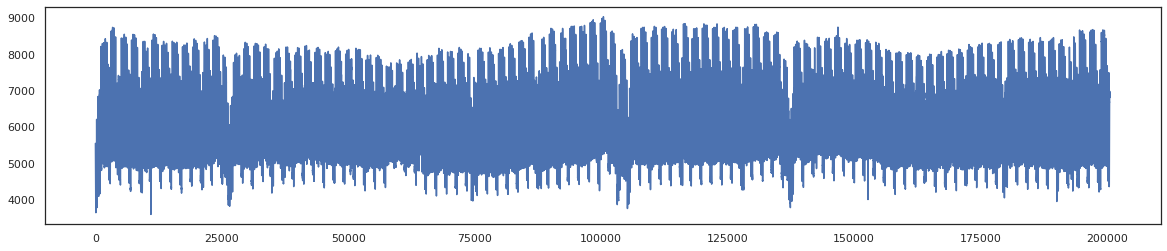

In [33]:
serie1 = df_5.SERIE1.tolist() ## Extraemos la primera serie
plt.figure(figsize=(20, 4))
plt.plot(serie1)
npserie1 = numpy.array(serie1)

[5547.8311522  5535.6181642  5529.0103514  ... 6933.8265626  6880.4650392
 6887.76318367]


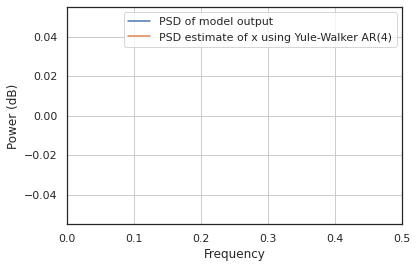

In [34]:
from pylab import *
import scipy.signal
from spectrum import *
y = npserie1
print(y)
p = Periodogram(y)
p();
p.plot()
p = pyule(y, 1000)
p()
p.plot()
legend(['PSD of model output','PSD estimate of x using Yule-Walker AR(4)'])

# Meta-función básica de pronóstico de un periodo (persistente)



In [35]:
# >>> provisional para pruebas preliminares (-comentar-)

positions_test= [(0, 34559, 43487)]    ## Predecir mayo
positions_test= [(8928, 43487, 44687)] ## Predecir junio


In [36]:
## ... time serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie ...
##                |                                               |           |       |
##                |                                               |<---n_p--->|       |
##                |<------------------ train -------------------->|<-------test------>|
##                to                                              tt                 tf 
n_p = 1  ## Numero de periodos de pronóstico por paso
forecastp_ = []
time_     = []
for to,tt,tf in positions_test:
    j=0
    for i in range(tt,tf,n_p):
        t_o = time.time()
        forecastp_=forecastp_+persistent(serie1[to+j:tt+j],n_p)
        time_.append(time.time() - t_o)
        j=j+n_p

In [37]:
test_ = []
for to,tt,tf in positions_test:
      test_ = test_+serie1[tt:tf]
print(len(forecastp_))
print(len(test_))

1200
1200


In [38]:
mae_p  = mean_absolute_error(test_,forecastp_)
mape_p = mean_absolute_percentage_error(test_,forecastp_)
bias_p = bias.bias(test_,forecastp_)
print('mae_p=',mae_p,'mape_p=',mape_p,'bias=',bias_p)

mae_p= 32.18053019449999 mape_p= 0.004972873854293973 bias= -0.9529797364999998


# Meta-función básica de multi-periodos (persistente)

Se usan 30 periodos equivalentes a dos horas y media en intervalos de cinco minutos


In [39]:
n_p = 30 ## Numero de periodos por salto
forecastmp_ = []
timemp_     = []
for to,tt,tf in positions_test:
    j=0
    for i in range(tt,tf,n_p):
        t_o = time.time()
        forecastmp_=forecastmp_+persistent(serie1[to+j:tt+j],n_p)
        timemp_.append(time.time() - t_o)
        j=j+n_p
    modu=(tf-tt)%n_p
    if modu > 0:
        forecastmp_=forecastmp_[0:(+modu-n_p)]
            

In [40]:
print(len(forecastmp_))
print(len(test_))

1200
1200


## Gráfica pronóstico persistente de un periodo

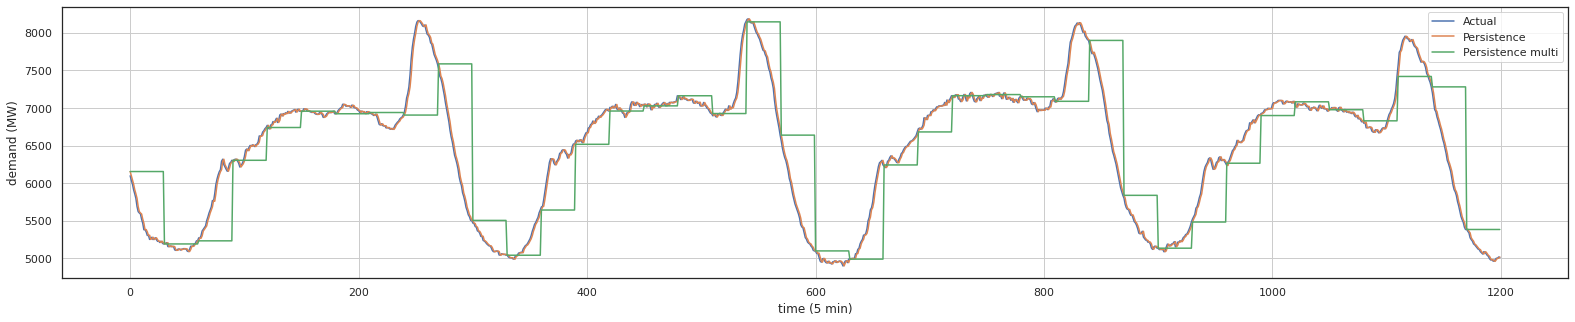

In [41]:
fig, ax = plt.subplots(figsize=(27,5))
ax.plot(test_[0:35892],       label='Actual')
ax.plot(forecastp_[0:35892],  label='Persistence')
ax.plot(forecastmp_[0:35892], label='Persistence multi')
ax.set(xlabel='time (5 min)', ylabel='demand (MW)')
ax.grid()
plt.legend()
fig.savefig("test.pdf")
plt.show()


In [42]:
mae_mp  = mean_absolute_error(test_,forecastmp_)
mape_mp = mean_absolute_percentage_error(test_,forecastmp_)
bias_mp  = bias.bias(test_,forecastmp_)
print('mae_mp=',mae_mp,'mape_mp=',mape_mp,'bias=',bias_mp)

mae_mp= 342.8185248058332 mape_mp= 0.05473998401768074 bias= -19.17048921383324


# Meta-función básica de pronóstico de un periodo (análogo)



In [43]:
## ... time serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie·time-serie ...
##                |                                               |           |       |
##                |                                               |<---n_p--->|       |
##                |<------------------ train -------------------->|<-------test------>|
##                to                  j=0...                      tt                 tf 
n_p = 1        ## Numero de periodos por salto
forecastAn_   = []
forecastAnMA_ = []
time3_        = []
n=0
nfail=0
fail_=False
for to,tt,tf in positions_test:
    j=0
    for i in range(tt,tf,n_p):
        ## Parámetros del método Análogo
        vsele = 288 ## Número de periodos en una ventana
        k     = 6   ## k:   número de vecinos mas cercanos
        tol   = 0.8 ## tol: porcentaje de tolerancia de cercania entre vecinos
        d     = 'pearson'
        m     = 'OLSstep'
        X_train = numpy.array(serie1[to+j:tt+j])

        t_o = time.time()
        try:
            pred_, t_sel_, t_reg_, fail_ = analogo_knn(X_train, vsele=vsele, k=k, tol=tol, typedist=d, typereg=m, verbose=False)
        except:
            print("!!! Error en la posicion:",tt+j)
        if fail_==True:              
            nfail = nfail + 1
            print(">>> Pronóstico persistente en la posicion:",tt+j)

        #forecastAn_.append(pred_[0])
        pred_list  = pred_.tolist() 
        forecastAn_ = forecastAn_ + pred_list[0:n_p]
        if j >= 20 :
            a = -min(j,vsele)
            b = -n_p
            array1 = np.array(forecastAn_[a:b])
            c = tt +j -min(j,vsele)
            d = tt +j -n_p 
            array2 = np.array(serie1[c:d])                        
            epsilon = np.subtract(array1,array2) ## Errores del primer pronóstico
            ar = AutoReg(epsilon, lags=1).fit()           
            delta = ar.forecast(1)

            #forecastAnMA_ = forecastAnMA_ + [pred_[0] - delta]
            MA_ = pred_list[0:n_p] - delta
            forecastAnMA_.extend(MA_)    
        else:
            forecastAnMA_ = forecastAn_

        time3_.append(time.time() - t_o)
        j=j+n_p

    modu=(tf-tt)%n_p

    if modu > 0:
        forecastAn_  =forecastAn_[  0:(+modu-n_p)]
        forecastAnMA_=forecastAnMA_[0:(+modu-n_p)]
        print(len(forecastAn_)); len(type(forecastAnMA_))

print('>>> Número de pronósticos no calculados', nfail)

>>> Número de pronósticos no calculados 0


In [44]:
print(len(forecastAn_))
print(len(forecastAnMA_))

1200
1200


In [45]:
date_i = df_5.reset_index().iloc[tt].Date

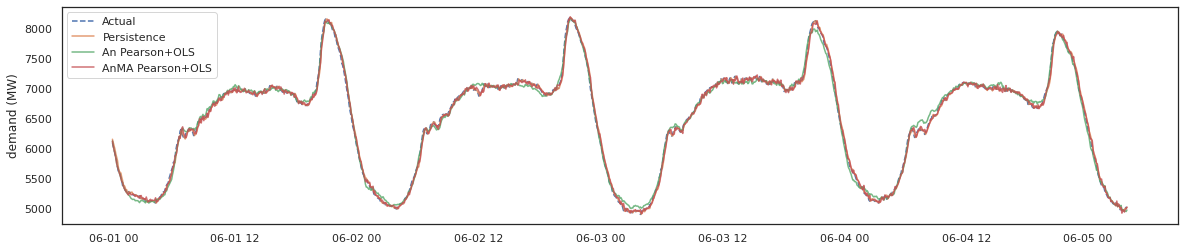

In [46]:
df_results = pd.DataFrame({
  'datetime' : pd.date_range(date_i, periods=len(test_), freq="5T"),
  'Actual' : test_,
  'Persistence' : forecastp_,
  'An Pearson+OLS' : forecastAn_,
  'AnMA Pearson+OLS' : forecastAnMA_
})
df_results = df_results.set_index('datetime')
plt.figure(figsize=(20, 4))
for c in df_results:
  if c == 'Actual':
    plt.plot(df_results[c], '--', label = c)
  else:
    plt.plot(df_results[c], label = c, alpha=0.8)
plt.legend()
plt.ylabel('demand (MW)')
plt.savefig("test2.pdf")
plt.show()

In [83]:
a=0; b=1200
mae_p  = mean_absolute_error(test_[a:b],forecastp_[a:b])
mape_p = mean_absolute_percentage_error(test_[a:b],forecastp_[a:b])
bias_p = bias.bias(test_[a:b],forecastp_[a:b])

In [85]:
mae_a  = mean_absolute_error(test_[a:b],forecastAn_[a:b])
mape_a = mean_absolute_percentage_error(test_[a:b],forecastAn_[a:b])
bias_a = bias.bias(test_[a:b],forecastAn_[a:b])

In [86]:
mae_ma  = mean_absolute_error(test_[a:b],forecastAnMA_[a:b])
mape_ma = mean_absolute_percentage_error(test_[a:b],forecastAnMA_[a:b])
bias_ma = bias.bias(test_[a:b],forecastAnMA_[a:b])

In [87]:
data = [diff(test_[a:b],forecastp_[a:b]), diff(test_[a:b],forecastAn_[a:b]), diff(test_[a:b],forecastAnMA_[a:b])]
labels = ['Persistence', 'An\n(Pearson+OLS)', 'AnMA\n(Pearson+OLS)']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "#FF0000"; # 'pink', 'lightblue', 'lightgreen',
#plt.tick_params(colors = LETRASNARA, which='both')
bplot1 = axes.boxplot(data,
                      vert=True,          # vertical box alignment
                      patch_artist=True,  # fill with color
                      labels=labels,)     # will be used to label x-ticks
#axes.set_title('Accuracy',fontsize='x-large',color = LETRASNARA)
#plt.tick_params(colors = LETRASNARA, which='both')
colors = ['pink', 'lightblue', 'lightgreen',LILA, AZUL] # fill with colors
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
axes.yaxis.grid(True) # adding horizontal grid lines
#axes.set_xlabel('Configuraciones de red',fontsize='large',color = LETRASNARA)
axes.set_ylabel('')
namefile = 'boxplot.pdf'
plt.savefig(namefile, transparent=True)
plt.show()

TypeError: ignored

8.606661315866587

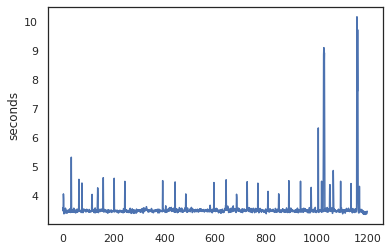

In [74]:
## Tiempo medio de AnMA Pearson OLS en horas
plt.plot(time3_,)
plt.ylabel('seconds')
((np.mean(time3_)*8723)/60)/60 

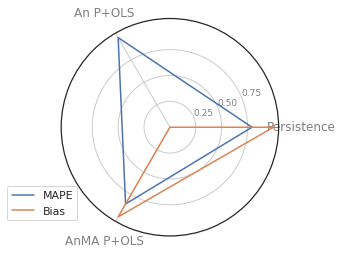

In [58]:
df_resultados = pd.DataFrame([
  {
    'method' : 'Persistence',
    'mape' : mape_p,
    'mae' : mae_p, # Conviene normalizar esto (o quitarlo porque normalizado es como el mape)
    'bias' : bias_p # Conviene normalizar esto
  },
  {
    'method' : 'An P+OLS',
    'mape' : mape_a,
    'mae' : mae_a, # Conviene normalizar esto (o quitarlo porque normalizado es como el mape)
    'bias' : bias_a # Conviene normalizar esto
  },
  {
    'method' : 'AnMA P+OLS',
    'mape' : mape_ma,
    'mae' : mae_ma, # Conviene normalizar esto (o quitarlo porque normalizado es como el mape)
    'bias' : bias_p # Conviene normalizar esto
  },
  # etc.
])
categories = df_resultados.method
N = len(categories)

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

theta = np.arange(len(df_resultados) + 1) / float(len(df_resultados)) * 2 * np.pi

values = df_resultados.mape.values
values = np.append(values, values[0])
values = values + abs(min(values))
values = values / max(values)
ax.plot(theta, values, label="MAPE")

values = df_resultados.bias.values
values = np.append(values, values[0])
values = values + abs(min(values))
values = values / max(values)
ax.plot(theta, values, label="Bias")

plt.xticks(theta[:-1], df_resultados.method, color='grey', size=12)
plt.yticks([0.25, 0.50, 0.75], ['0.25', '0.50', '0.75'], color="grey", size=9)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot

plt.legend(loc='center right', bbox_to_anchor=(0.1, 0.15))
plt.show()